# Design of a Train Traction Motor

## Design Specifications
The specs of the traction asynchronous squirrel cage induction motor, which the design project contains, are:
- Rated Power Output: 1280 kW
- Line-to-line voltage: 1350 V
- Number of poles: 6
- Rated Speed: 1520 rpm (72 km/h) (driven with 78 Hz inverter)
- Rated Motor Torque: 7843 Nm
- Cooling: Forced Air Cooling
- Insulating Class: 200
- Train Wheel Diameter: 1210 mm
- Maximum Speed: 140 km/h
- Gear Ratio: 4.821

## Design Procedure
_In this part, explain the procedure..._

## The Output Coefficient Design Concept
In this very first part of the design process, the main purpose is to finalize the geometrical parameter design of the induction motor. 

### Emf coefficient KE
KE=0.98-0.005*p1 where p1 is the pole pair 

In [354]:
import math

In [516]:
p1=3
KE=0.98-0.005*p1
print ('emf coefficient=',KE)

emf coefficient= 0.965


### Airgap apparent power

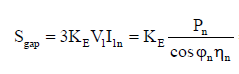

In [340]:
from IPython.display import Image
Image(filename='Images/Sgap.png')

For efficiency assumption, I will use the IEC (International Electrotechnical Commission) standarts:

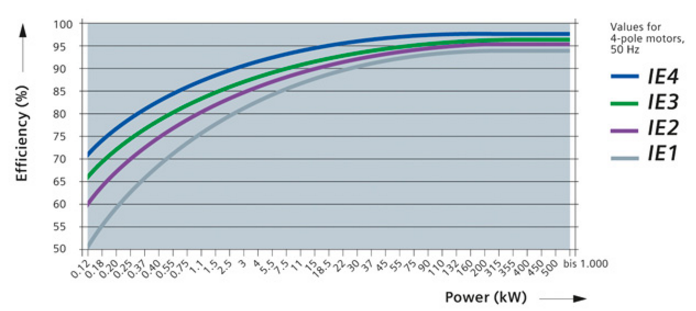

In [8]:
from IPython.display import Image
Image(filename='Images/EffvsP.png')

http://www.iec.ch/perspectives/government/sectors/electric_motors.htm referans ver!

In IEC standarts, IE1 Standard efficiency, IE2 High efficiency, IE3 Premium efficiency, IE4 Super premium efficiency. At this point, I choose 96% efficiency for premium efficiency selection.

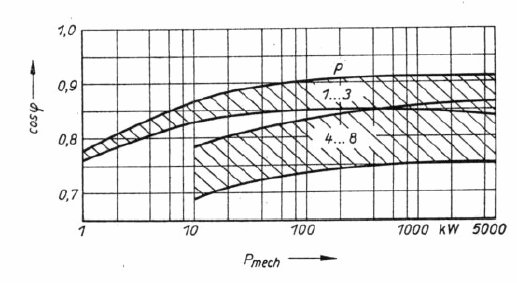

In [1]:
from IPython.display import Image
Image(filename='Images/pf.png')

For our case cosϕ = 0.92 – 0.93. Lets take pf=0.92.

In [517]:
pf=0.92
eff=0.96
Pout=1280000
Sgap=((KE*Pout)/(pf*eff))
print ('airgap apparent power=',Sgap,'VA')


airgap apparent power= 1398550.7246376812 VA


### Esson’s “constant” C0

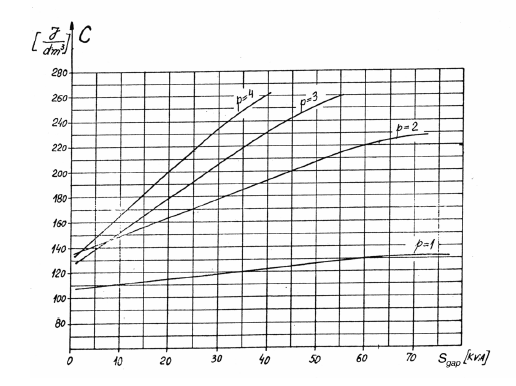

In [8]:
from IPython.display import Image
Image(filename='Images/Co.png')

From the graph, lets say Co converges to 320000J/m^3

In [518]:
Co= 320000

### Stack aspect ratio

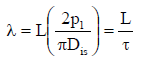

In [37]:
from IPython.display import Image
Image(filename='Images/alfa2.png')

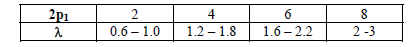

In [5]:
from IPython.display import Image
Image(filename='Images/alfa.png')

In [519]:
λ = 1.6 #take it for 2p=6

### Stator main dimensions

To calculate stator main dimensions (stator bore diameter and stack length and outer diameter), we can use below equations from Ion Boldea, Syed A. Nasar Induction Machice textbook

Consider stator bore diameter first:

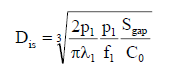

In [3]:
from IPython.display import Image
Image(filename='Images/Dis.png')

In [520]:
f=78
p1=3
Dis=((2*p1*p1*Sgap)/(3.14*λ*f*Co))**(1/3)
print ('The stator bore diameter Dis=',Dis,'m')


The stator bore diameter Dis= 0.5855340725654195 m


For stack length:

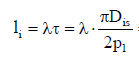

In [28]:
from IPython.display import Image
Image(filename='Images/stacklength.png')

In [521]:
l=(λ*3.14*Dis)/(2*p1)
print ('The stack length l=',l,'m')

The stack length l= 0.4902871967614446 m


Finally, lets calculate outer diameter:

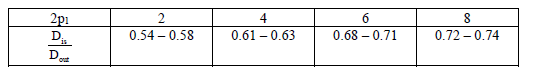

In [31]:
from IPython.display import Image
Image(filename='Images/Douter.png')

Inner/outer stator diameter ratio calls Kd which is used for Dout calculation. For our train traction motor, we can take Kd=0.7

In [522]:
Dout=Dis/0.7
print ('The stator outer diameter Dout=',Dout,'m')

The stator outer diameter Dout= 0.8364772465220278 m


### The airgap value
Optimization of the air gap is another isse because extramely small airgap causes large space airgap field harmonics and additional losses and extramely large airgap decreases the power factor and efficiency undesirably. From the book, we can do optimization like this:

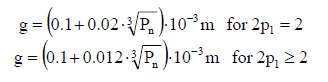

In [33]:
from IPython.display import Image
Image(filename='Images/airgap.png')

Second one would be our case.

In [523]:
Pn=1280000
g=(0.1+0.012*(Pn)**(1/3))*10**(-3)
print ('Airgap=',g,'m')

Airgap= 0.001402920455965555 m


### Stator Winding
Now, lets start with selecting the number of the slots per phase per pole! Take it 4!

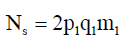

In [3]:
from IPython.display import Image
Image(filename='Images/numofstatorslot.png')

In [524]:
p1=3
m1=3
q1=4
Ns=2*p1*q1*m1
print ('The number of stator slot',Ns)

The number of stator slot 72


Now, lets find slots per pole per phase:

Now lets find slot angle alpha:

In [525]:
alpha=(3.14)/q1/3
print ('The  slot angle',alpha,'radian')

The  slot angle 0.26166666666666666 radian


Now, lets calculate chording factor, zone factor and winding factor:

At this point, we need to decide which pitch number and layer type of the winding. To eleminate 5th harmonic (actually to get dramatic decrease for the 5th harmonic), we can choose 5/6 pitch double layer winding in the stator.
I choose the 5th harmonics because 3rd harmonics are already eleminated by the three phase system naturaly.

In [526]:
kp= math.sin(math.pi/2*5/6)
kd=( math.sin(q1*alpha/2))/(q1* math.sin(alpha/2)) 
kw=kd*kp 
print ('winding factor',kw)

winding factor 0.9250716169739188


Now, stotor slot pitch is another issue:

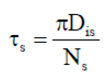

In [237]:
from IPython.display import Image
Image(filename='Images/statorslotpitch.png')

In [502]:
τ=math.pi*Dis/Ns
print ('The stator slot pitch',τ,'m')

The stator slot pitch 0.025548743622194926 m


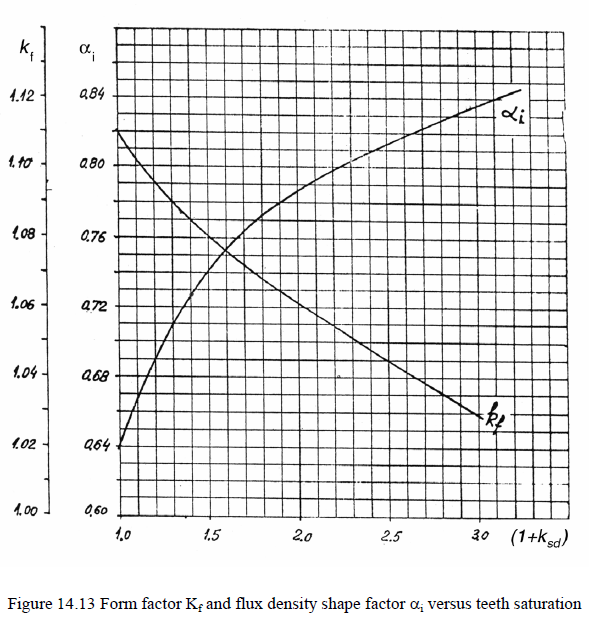

In [2]:
from IPython.display import Image
Image(filename='Images/Kf-alfa.png')

Assuming a tooth saturation factor (1 + Kst) = 1.25. From the figure above, it can be seen that KB = 1.1, αi = 0.69.

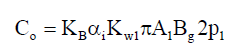

In [51]:
from IPython.display import Image
Image(filename='Images/statorratedIsheet.png')

Now, the airgap flux density is taken as Bg = 0.7 T here!

In [527]:
KB = 1.1
αi = 0.69
Bg = 0.7
A1=Co/(KB* αi *kw*math.pi*Bg*2*p1)
print ('The stator rated current sheet',A1,'Aturns/m')

The stator rated current sheet 34540.90268824518 Aturns/m


Lets see pole flux:

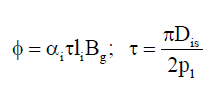

In [58]:
from IPython.display import Image
Image(filename='Images/poleflux.png')

In [528]:
φ=αi*(math.pi*Dis/2/p1)*l*Bg
print ('pole flux',φ,'Wb')

pole flux 0.07260198208199094 Wb


Now, calculate number of turns per phase:

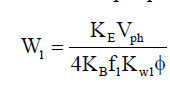

In [61]:
from IPython.display import Image
Image(filename='Images/numofturnperphase.png')

In [529]:
Vph=1350/math.sqrt(3)
W1=KE*Vph/(4*KB*f*kw*φ)
print ('number of turns per phase',W1)

number of turns per phase 32.630921747433526


Next, the number of conductors per slot ns is written as:

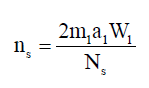

In [67]:
from IPython.display import Image
Image(filename='Images/numofconductorsperslot.png')

In [530]:
m1=3 
a1=1    
ns=2*m1*a1*W1/Ns
print ('the number of conductors per slot',ns)

the number of conductors per slot 2.719243478952794


Take ns=2 (it should be integer). But it becomes necessity to increase the ideal stack length l:

In [531]:
ns=2
l=l*2.719243478952794/2
print ('new stack length l=',l,'m')

new stack length l= 0.6666051313038018 m


Also, this approximation will change (actually increase) flux per pole value like this:

In [532]:
φ=φ*2/2.719243478952794
Bg=Bg*2/2.719243478952794
print ('new pole flux',φ,'Wb')
print ('new airgap flux density',Bg,'T')

new pole flux 0.05339866227054492 Wb
new airgap flux density 0.5148490787368378 T


After finding slot number, final stack length, turn number per phase and flux per pole, lets continue to stator winding calculations with **slot dimentions.** Lets start with the stator line to neutral current: (Assume Delta connection)

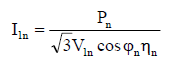

In [1]:
from IPython.display import Image
Image(filename='Images/RatedCurrent.png')

In [533]:
Vln=1350
Iln=Pout/(1.732*Vln*pf*eff )
print ('stator line to neutral current',Iln,'A')

stator line to neutral current 619.8252340769997 A


Here it is required to select current density of the stator to find the conductor cross section ACo. To do this I did some reseach about selecting the stator current density:

**Here give reference** http://publish.illinois.edu/grainger-ceme/files/2014/06/CEME1109HarleyGeorgiaTech.pdf

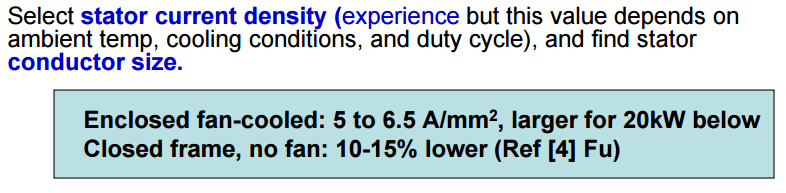

In [24]:
from IPython.display import Image
Image(filename='Images/currentdensityselection.png')

Considering the power of the IM and cooling conditions, we can take the stator current density approximately 7 A/mm2.

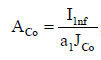

In [25]:
from IPython.display import Image
Image(filename='Images/conductorcrosssection.png')

In [534]:
Jco=7
Aco=Iln/Jco/1000000
print ('conductor cross section area',Aco,'m2')

conductor cross section area 8.854646201099995e-05 m2


The wire gauge diameter:

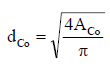

In [30]:
from IPython.display import Image
Image(filename='Images/wiregauge.png')

In [535]:
dco=math.sqrt (4*Aco/math.pi)
print ('wire gauge diameter',dco,'m')

wire gauge diameter 0.010617949754015366 m


Lets check skin depth for copper, 78Hz from skin depth calculator:

give referance:
http://www.rfcafe.com/references/calculators/skin-depth-calculator.htm

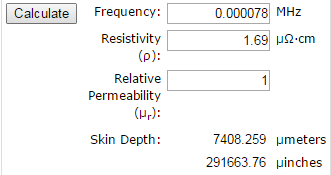

In [41]:
from IPython.display import Image
Image(filename='Images/skindepthofwire.png')

Then we can say that the conductor diameter is okay for skin effect.

To reach the stator slot area, we need fill factor. Kfill (fill factor) for above 10kW machines is about 0.44.
Now, stator slot area will be:

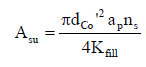

In [42]:
from IPython.display import Image
Image(filename='Images/slotarea.png')

In [536]:
Kfill=0.44
ap=1
Asu=(math.pi*dco*dco*ns*ap)/(4*Kfill)
print ('stator slot area',Asu,'m2')

stator slot area 0.00040248391823181803 m2


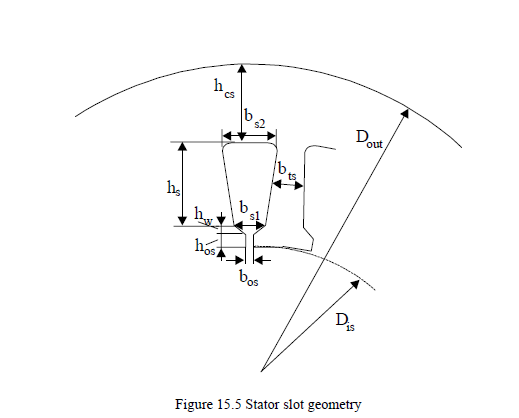

In [65]:
from IPython.display import Image
Image(filename='Images/slot.png')

Assuming that all the airgap flux passes through the stator teeth:

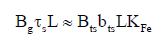

In [71]:
from IPython.display import Image
Image(filename='Images/bts.png')

In [537]:
bos=0.0022
hos=0.001
hw=0.0015
Kfe=0.96
Bts=1.6           #Bts = 1.5 – 1.65 T
bts=(Bg*τ)/(Bts*Kfe)
print ('the tooth width',bts,'m')

the tooth width 0.00856363744581427 m


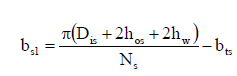

In [76]:
from IPython.display import Image
Image(filename='Images/bs1.png')

In [538]:
bs1=(math.pi*(Dis+2*hos+2*hw)/Ns)-bts
print ('the slot lower width',bs1,'m')

the slot lower width 0.017203272332879944 m


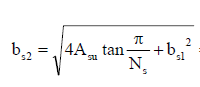

In [84]:
from IPython.display import Image
Image(filename='Images/bs2.png')

In [539]:
bs2=math.sqrt((4*(Asu/1000000)*math.tan((math.pi)/Ns))+(bs1*bs1))
print ('the slot higher width',bs2,'m')

the slot higher width 0.017203274375843167 m


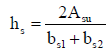

In [100]:
from IPython.display import Image
Image(filename='Images/hs.png')

In [540]:
hs=2*Asu/(bs1+bs2)
print ('the slot useful height hs',hs,'m')

the slot useful height hs 0.02339577532375698 m


After all stator slot dimensions, lets see airgap MMF:

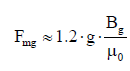

In [120]:
from IPython.display import Image
Image(filename='Images/airgapmmf.png')

In [541]:
μo=1.256*0.000001
Fmg=1.2*g*Bg/μo
print ('the airgap mmf Fmg',Fmg,'Aturns')

the airgap mmf Fmg 690.0881888168126 Aturns


Lets see the lamination magnetization curve of the book:

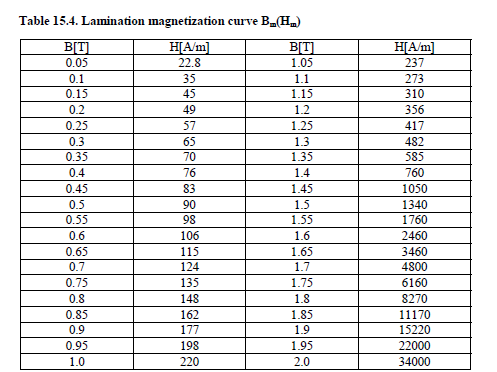

In [126]:
from IPython.display import Image
Image(filename='Images/magnetizationcurve.png')

From the table, we can see that for 1.65 T we have 2460 A/m on the curve.

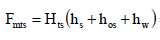

In [127]:
from IPython.display import Image
Image(filename='Images/statortoothmmf.png')

In [542]:
Hts=2460
Fmts=Hts*(hs+hos+hw)
print ('the stator tooth mmf Fmts',Fmts,'Aturns')

the stator tooth mmf Fmts 63.70360729644218 Aturns


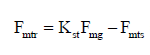

In [134]:
from IPython.display import Image
Image(filename='Images/rotortoothmmf.png')

In [543]:
Kst=0.2
Fmtr=Kst*Fmg-Fmts
print ('the rotor tooth mmf Fmts',Fmtr,'Aturns')

the rotor tooth mmf Fmts 74.31403046692034 Aturns


At first, I choose the Bg (at the beginning) 0.8T, however for this case there is much more difference between rotor and stator mmf values. Then, I decrease Bg to 0.7T. Then, now they are enough close to eachother!

Now, use stator back iron core height formulation:

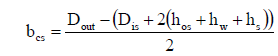

In [139]:
from IPython.display import Image
Image(filename='Images/statorbackironheight.png')

In [544]:
hcs=(Dout-Dis-2*(hos+hw+hs))/2
print ('stator back iron core height',hcs,'m')

stator back iron core height 0.09957581165454721 m


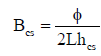

In [144]:
from IPython.display import Image
Image(filename='Images/backcore.png')

In [545]:
Bcs=φ/2/l/hcs
print ('The back core flux density',Bcs,'T')

The back core flux density 0.402233163084033 T


This flux density is a lower value than we expected. Hence, to increase the back core flux density to the range of 1.4 and 1.7T, we need to decrease the Dout:

In [551]:
Dout_new=0.69
hcs_new=(Dout_new-Dis-2*(hos+hw+hs))/2
Bcs_new=φ/2/l/hcs_new
print ('new stator back iron core height',hcs_new,'m')
print ('new back core flux density',Bcs_new,'T')

new stator back iron core height 0.02633718839353327 m
new back core flux density 1.5207657358863267 T


## Rotor Slots

We finished the stator design. Lets start rotor design of the IM.

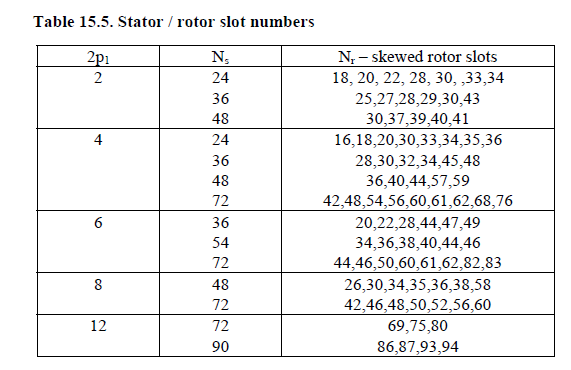

In [48]:
from IPython.display import Image
Image(filename='Images/rotorslot.png')

2p1 is 6 in our case and Ns is 72. Hence Nr can be 44,46,50,60,61,62,82,83. Lets let it be 62.

To find rated rotor bar current, we need KI value:

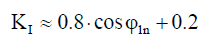

In [49]:
from IPython.display import Image
Image(filename='Images/Kı.png')

In [552]:
KI=0.8*pf+0.2
print ('KI',KI)

KI 0.9360000000000002


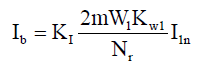

In [51]:
from IPython.display import Image
Image(filename='Images/rotorbarcurrent.png')

In [553]:
Nr=62
Ib=KI*2*m1*W1*kw*Iln/Nr
print ('rated rotor bar currenty',Ib,'A')

rated rotor bar currenty 1694.764509003995 A


As the author assume for high efficiency in the book, we can take the current density in the rotor side 3.42 A/mm2

In [554]:
Jb=3.42
Ab=Ib/Jb/1000/1000 #over 1000 to unit convertion
print ('rotor slot area',Ab,'m2')

rotor slot area 0.0004955451780713436 m2


Lets find end ring current with this formula in the book:

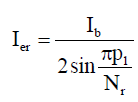

In [62]:
from IPython.display import Image
Image(filename='Images/endringcurrent.png')

In [555]:
Ier=Ib/2/math.sin(math.pi*p1/Nr)
print ('rotor end ring current',Ier,'A')

rotor end ring current 5595.949887571894 A


In [556]:
Jer = 0.75*Jb*1000*1000 #convert it to m2
print ('rotor end ring current density',Jer,'A/m2')

rotor end ring current density 2565000.0 A/m2


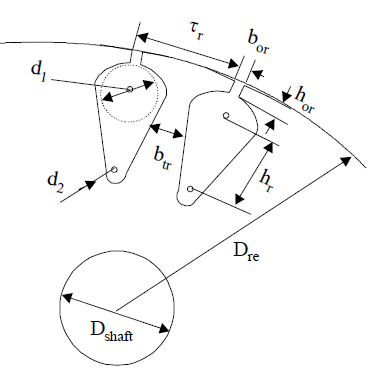

In [68]:
from IPython.display import Image
Image(filename='Images/rotorslotgeo.png')

Above, you can see the rotor slot geometry that we will use in this design process.

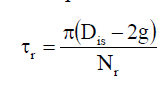

In [69]:
from IPython.display import Image
Image(filename='Images/rotorslotpitch.png')

In [557]:
τr=math.pi*(Dis-2*g)/Nr
print ('rotor slot pitch, τr',τr,'m')

rotor slot pitch, τr 0.029527334380676933 m


Lets start dimensions of the rotor slots with the tooth width btr. Take rotor tooth flux density Btr = 1.60T

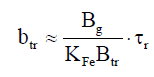

In [71]:
from IPython.display import Image
Image(filename='Images/rotortoothwidth.png')

In [558]:
Btr=1.6
btr=Bg*τr/Kfe/Btr #we calculated the new Bg before
print ('rotor tooth width',btr,'m')


rotor tooth width 0.009897214129847707 m


Now, lets consider rotor diameter:

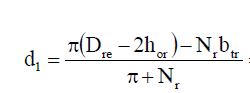

In [80]:
from IPython.display import Image
Image(filename='Images/rotordiameter.png')

In [559]:
Dre=Dis-g
hor=0.0005
bor=0.0015
d1=(math.pi*(Dre-2*hor)-Nr*brt)/(math.pi+Nr)
print ('d1',d1,'m')

d1 0.018702847410788863 m


Lastly, to find d2 and hr, we will use these two formulas:

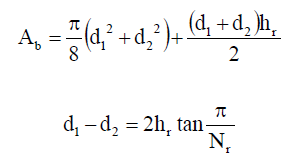

In [93]:
from IPython.display import Image
Image(filename='Images/d2andhr.png')

After some paper work, I found that hr=0.039m and d2=0.011m, approximately.

In [560]:
hr=0.039
d2=0.014

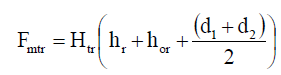

In [102]:
from IPython.display import Image
Image(filename='Images/mmftr.png')

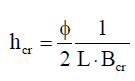

In [143]:
from IPython.display import Image
Image(filename='Images/rotorbackcoreheight.png')

In [561]:
Bcr=1.6
hcr=φ/2/l/Bcr
print ('rotor back core height',hcr,'m')

rotor back core height 0.025032933555292774 m


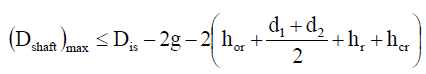

In [149]:
from IPython.display import Image
Image(filename='Images/shaft.png')

In [562]:
Dshaft=Dis-2*g-(hor+((d1+d2)/2)+hr+hcr)
print ('max shaft diameter',Dshaft,'m')

max shaft diameter 0.5018438743928011 m


Now, it is time to calculate rated torque.

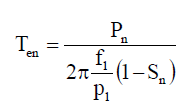

In [151]:
from IPython.display import Image
Image(filename='Images/ratedtorque.png')

In [563]:
Sn=0.002 #rated slip can be taken 0.002 for most of the IM
Ten=Pn*p1/2/math.pi/f/(1-Sn)
print ('rated torque',Ten,'Nm')

rated torque 7851.022319933176 Nm


**Calculated rated torque is really close to the given rated torque in the specs of the IM!!**

For rotor lastly, lets observe the end ring cross sections:

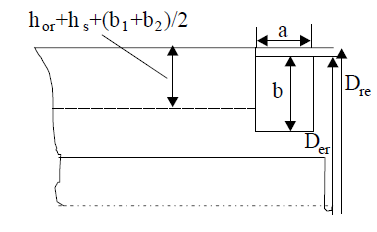

In [159]:
from IPython.display import Image
Image(filename='Images/rotorend.png')

In [564]:
Aer=Ier/Jer

Der=Dre-0.005
b=hor+hr
a=Aer/b

print ('Der',Der,'m')
print ('b',b,'m')
print ('a',a,'m')

Der 0.5791311521094539 m
b 0.0395 m
a 0.055231819651806395 m


## Magnetization Current
To calculate the magnetization mmf Flm we need to calculate back core mmf's as you can see below formula.

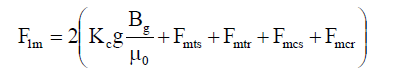

In [169]:
from IPython.display import Image
Image(filename='Images/magnetizationmmf.png')

For this purpose, lets calculate Carter's coef:

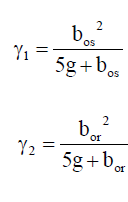

In [172]:
from IPython.display import Image
Image(filename='Images/kartersvariables.png')

In [565]:
γ1=bos*bos/(5*g+bos)
γ2=bor*bor/(5*g+bor)

Now, lets remark the relation between Carter's coefs (stator and rotor) and these variables:

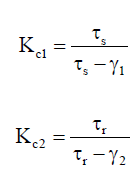

In [566]:
from IPython.display import Image
Image(filename='Images/karterscoefs.png')

In [567]:
Kc1=τ/(τ-γ1)
Kc2=τr/(τr-γ2)
Kc=Kc1*Kc2
print ('Carters Coef',Kc)

Carters Coef 1.0302101706885423


Ccs and Ccr are subunitary empirical coefficients that define an average length of flux path in the back core. We will use them to find Flm:

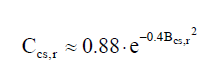

In [181]:
from IPython.display import Image
Image(filename='Images/Csr.png')

In [568]:

Ccs=0.88*math.e**(-0.4*Bcs_new*Bcs_new)
Ccr=0.88*math.e**(-0.4*Bcr*Bcr)


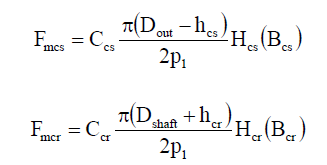

In [184]:
from IPython.display import Image
Image(filename='Images/backcoremmfs.png')

In [569]:
Hcs=117 #for Bcs_new=0.9
Hcr=2460 #for Bcr=1.6

Fmcs=Ccs*math.pi*(Dout-hcs)*Hcs*Bcs_new
Fmcr=Ccr*math.pi*(Dshaft-hcr)*Hcr*Bcr

print('Fmcs',Fmcs)
print('Fmcr',Fmcr)

Fmcs 143.723588026943
Fmcr 1863.4437911384175


Now, we can finally calculate total magnetization mmf:

In [570]:
Flm=2*(Kc*g*Bg/μo+Fmts+Fmtr+Fmcs+Fmcr)
print('magnetization mmf Flm',Flm,'Aturn')

magnetization mmf Flm 5475.263151842639 Aturn


Lets see total saturation factor:

In [571]:
Ks=Flm/2/Fmg-1
print(Ks)

2.9670749627161603


Magnetizing current is another important issue at this point which can be expressed like this:

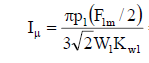

In [197]:
from IPython.display import Image
Image(filename='Images/magcurrent.png')

In [572]:
Im=math.pi*p1*Flm/6/math.sqrt(2)/W1/kw
print('Magnetizing current',Im,'A')

Magnetizing current 201.4675839689445 A


In [573]:
im=Im/Iln
print(im)

0.32503933833696835


## Resistances

Lets start with stator resistance:

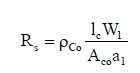

In [202]:
from IPython.display import Image
Image(filename='Images/Rs.png')

lc is coil length. We can describe it like this:

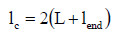

In [204]:
from IPython.display import Image
Image(filename='Images/coillength.png')

Interesting formula for end winding length (for 6 pole machine) is:

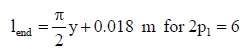

In [205]:
from IPython.display import Image
Image(filename='Images/endwindinglength.png')

In [574]:
lend=math.pi/2*7/9*τ+0.018
lc=2*(l+lend)
print('total copper length for one coil', lc,'m')

total copper length for one coil 1.431637620041332 m


In [575]:
ρco=2.17*10**-8 #ohm for copper at 80oC
Rs=ρco*lc*W1/Aco
print('stator resistance', Rs, 'ohm')


stator resistance 0.011448562638612325 ohm


The rotor bar/end ring segment equivalent resistance Rbe:

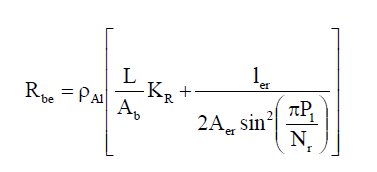

In [457]:
from IPython.display import Image
Image(filename='Images/Rbe.png')

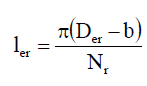

In [458]:
from IPython.display import Image
Image(filename='Images/ler.png')

In [576]:
ler=math.pi*(Der-b)/Nr
print('end ring segment length', ler, 'm')

end ring segment length 0.027343568759923494 m


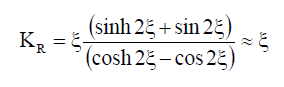

In [463]:
from IPython.display import Image
Image(filename='Images/KR.png')

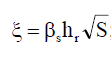

In [464]:
from IPython.display import Image
Image(filename='Images/E.png')

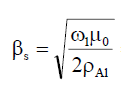

In [465]:
from IPython.display import Image
Image(filename='Images/beta.png')

In [577]:
ρal=3.1*10**-8
S=1

βs=math.sqrt(2*math.pi*f*μo/2/ρal)
ξ=βs*hr*math.sqrt(S)
KR=ξ

Rbe=ρal*(l*KR/Ab+ler/2/Aer/(math.sin(math.pi*p1/Nr))**2)
print('rotor bar/end ring segment equivalent resistance', Rbe, 'ohm')

rotor bar/end ring segment equivalent resistance 0.00017052164616542434 ohm


The rotor cage resistance reduced to the stator Rr' is:

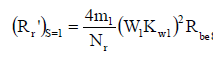

In [215]:
from IPython.display import Image
Image(filename='Images/rotorresistance.png')

In [578]:
Rr=4*m1*W1*W1*kw*kw*Rbe/Nr
print('rotor resistance', Rr, 'ohm')

rotor resistance 0.03007311873130935 ohm


## Efficiency

We know the critic formula:)

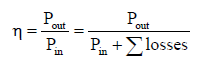

In [218]:
from IPython.display import Image
Image(filename='Images/eff.png')

Consider losses:

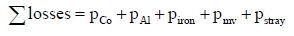

In [219]:
from IPython.display import Image
Image(filename='Images/losses.png')

In [579]:
pco=3*Rs*Iln*Iln
print('the stator winding losses', pco, 'W')

the stator winding losses 13195.040438618853 W


In [580]:
pal=3*Rr*Iln*Iln
print('the rotor cage losses', pal, 'W')

the rotor cage losses 34660.771862895686 W


The mechanical/ventilation losses can be considered as pmv=0.008Pn for 6 pole machines:

In [581]:
pmv=0.008*Pn
print('the mechanical/ventilation losses', pmv, 'W')

the mechanical/ventilation losses 10240.0 W


The stray losses pstray is taken as 0.01Pn standard value:

In [582]:
pstray=0.01*Pn
print('the stray losses', pstray, 'W')

the stray losses 12800.0 W


Iron core losses are more complex to calculate. And finally to finallize the loss power calculation, lets start to calculate iron (core) loss:

First of all, piron=piron1(fundamental)+pironh(other harmonics)

Then,piron1=pt1(teeth core)+py1(back core,yoke)

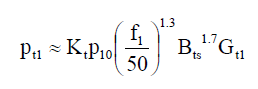

In [479]:
from IPython.display import Image
Image(filename='Images/pt1.png')

In [583]:
p10=2.5    #specific losses in W/Kg at 1.0 Tesla and 50 Hz p10 = (2–3)
Kt=1.65    #Kt = (1.6 – 1.8)
γiron=7800 
Gt1=γiron*Ns*bts*(hs+hw+hos)*l*Kfe    #Gt1=stator tooth weight
pt1=Kt*p10*(f/50)**1.3*Bts**1.7*Gt1
print('teeth core fundamental component power loss', pt1, 'W')

teeth core fundamental component power loss 1302.9989829526692 W


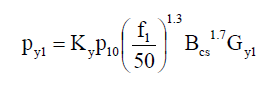

In [481]:
from IPython.display import Image
Image(filename='Images/py1.png')

In [584]:
Ky=1.6
Gy1=γiron*math.pi/4*(Dout_new**2-(Dout_new-2*hcs)**2)*l*Kfe
py1=Ky*p10*(f/50)**1.3*Bcs_new**1.7*Gy1
print('yoke core fundamental component power loss', py1, 'W')

yoke core fundamental component power loss 13406.958607629316 W


In [585]:
piron1=py1+pt1
print('fundamental iron losses', piron1, 'W')

fundamental iron losses 14709.957590581986 W


Continue with tooth flux pulsation core loss:

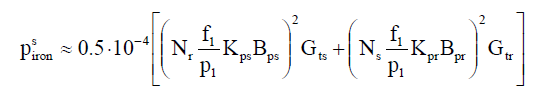

In [488]:
from IPython.display import Image
Image(filename='Images/pironh.png')

In [587]:
Kps=(2.2-Bts)**-1
Kpr=(2.2-Btr)**-1
Bps=(Kc2-1)*Bg
Bpr=(Kc1-1)*Bg
Gtr=γiron*l*Kfe*Nr*(hr+(d1+d2)/2)*btr    #rotor teeth weight kg
pironh=0.5*10**-4*((Nr*f*Kps*Bps/p1/p1)**2*Gt1+(Ns*f*Kpr*Bpr/p1)**2*Gtr)
print('harmonic iron losses', pironh, 'W')

harmonic iron losses 9.706235488351977 W


Total core loss:

In [588]:
piron=piron1+pironh
print('Total core loss of the IM', piron, 'W')

Total core loss of the IM 14719.663826070338 W


The final step to find the efficiency is to add all the loss components together:

In [589]:
Totalloss=pco+pal+piron+pmv+pstray
print('Total loss of the IM', Totalloss, 'W')

Total loss of the IM 85615.47612758487 W


**efficiency:**

In [591]:
η=Pn/(Pn+Totalloss)
print('Efficiency of the machine (η) is', η )

Efficiency of the machine (η) is 0.9373063079437552


**Assumed and calculated efficieny values are really close to eachother**